# Jamming signal generation and initial evaluations

## Summary

1. I generated 5 kinds of JSS signals (white-noise, ask, psk, fsk, qam) the day before yesterday and got the LSTM evaluation results. 

2. The results for (fsk, qam) are great, with (~100% for FPR)

3. However, the results for white-noise, ask, psk were really bad (Detection rate ~1% when the FPR is 10%). 

4. The reasons for this might be in my generation process: 

   (1) the added power was low (with a mean value of 3dB across all the frequency), so the original BS pattern still exists for some frequencies. 

   (2) Just add power on a spectrogram level might have some problems, might translate back to raw data level to have them added.

## Signal generation

My generation process is like: 

For jamming: 1) create random Gaussian noise with 3dB higher power; 2) add it with the observer signals on a spectrogram level.

For spectrum stealing: 1) create random bits; 2) modulate the bits using one of (ask, psk, fsk, qam); 3) adjust the power mean of the modulated signals to be 3dB higher than the original BS spectrogram; 4) add it with the observer signals on a spectrogram level.

### Categories
- White noise
- Different digital modulation methods
    - ASK
    - PSK
    - FSK
    - QAM
    
- Why I try to simulate 4 kinds of digital modulation methods?
    - For different modulation the spectrogram can have different patterns.

### ASK generations

Text(0.5, 1, 'Spectrogram of ASK')

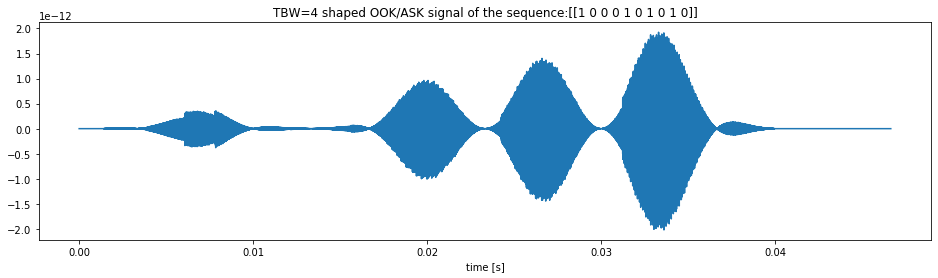

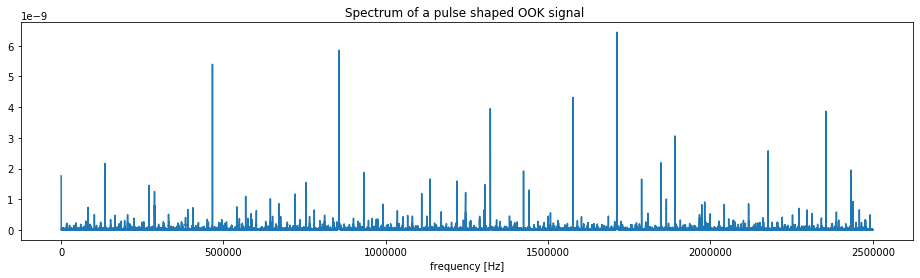

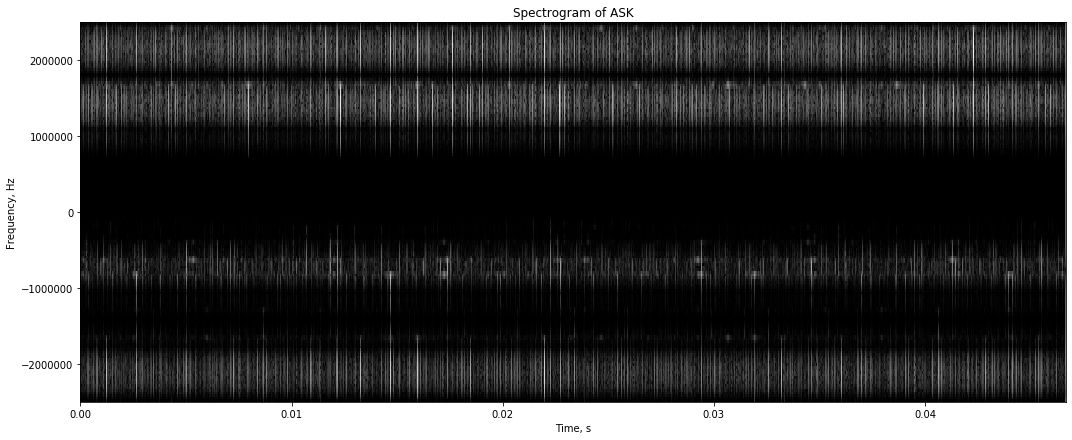

In [211]:
imp = zeros(N)
imp[::Ns] = bits.ravel()

h = signal.firwin(Ns*4,1.0/Ns)
imp_sinc = signal.fftconvolve(imp,h,mode='full')
t = r_[0.0:len(imp_sinc)]/fs
OOK_s = imp_sinc*sin(2*pi*f0*t)

fig = plt.figure(figsize = (16,4))
plt.plot(t,OOK_s)
plt.xlabel('time [s]')
plt.title('TBW=4 shaped OOK/ASK signal of the sequence:'+ np.array2string(np.transpose(np.uint8(bits))))

f = r_[0:len(imp_sinc)/2.0]/len(imp_sinc)*fs
OOK_sf = (np.fft.fft(OOK_s))

fig = plt.figure(figsize = (16,4))
plt.plot(f,abs(OOK_sf[0:int(len(OOK_sf)/2+1)]))
plt.xlabel('frequency [Hz]')
plt.title('Spectrum of a pulse shaped OOK signal ')
# plt.axis((0,4096,0,max(abs(OOK_sf))))

tt,ff,xmf = myspectrogram_hann_ovlp(OOK_sf, 148, 5000000, 0,dbf = 60)
plt.title('Spectrogram of ASK')

### BPSK generations

In [262]:
fs = 44100  # sampling rate
baud = 300  # symbol rate
Nbits = 10  # number of bits
Ns = int(fs/baud)
N = Nbits * Ns
f0 = 1800
bits = randn(Nbits,1) > 0

In [263]:
import matplotlib
# matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'BPSK signal of the sequence:[[1 0 0 0 1 0 1 0 1 0]]')

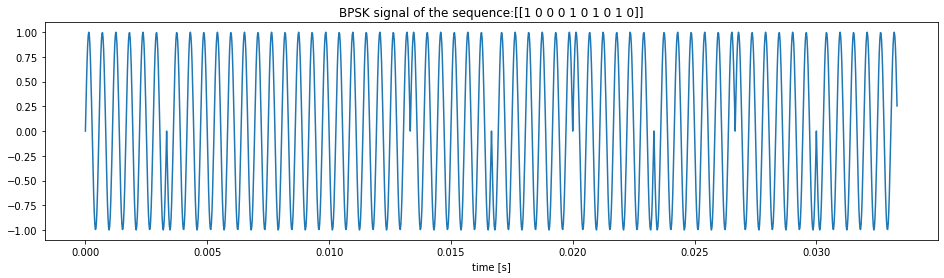

In [266]:
np.random.seed(seed=1)
bits = randn(Nbits,1) > 0 
# print(bits)
M = np.tile(bits*2-1,(1,Ns))
t = r_[0.0:N]/fs
BPSK = M.ravel()*sin(2*pi*f0*t)

fig = plt.figure(figsize = (16,4))
plt.plot(t,BPSK)
plt.xlabel('time [s]')
plt.title('BPSK signal of the sequence:'+ np.array2string(np.transpose(np.uint8(bits))))

#### Add a filter to the generated signals

Text(0.5, 1, 'Spectrogram of MSK')

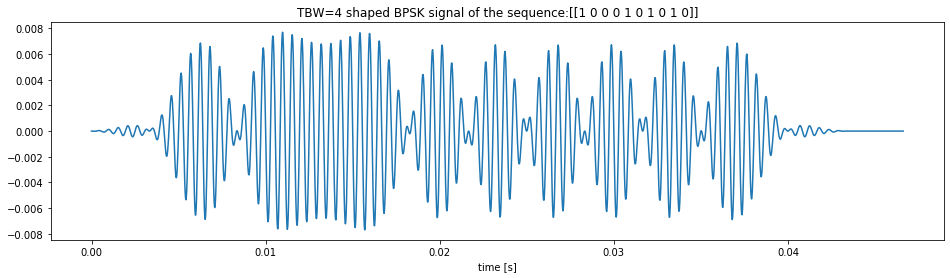

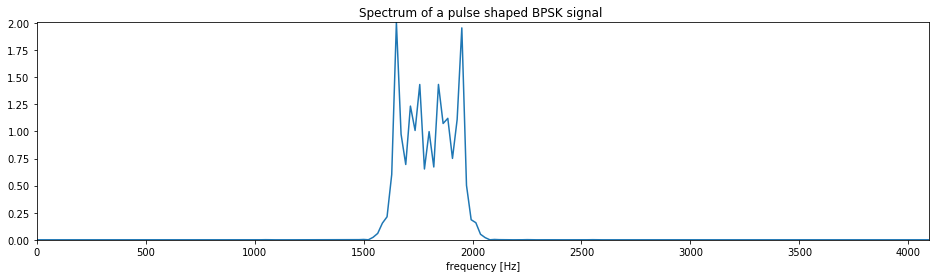

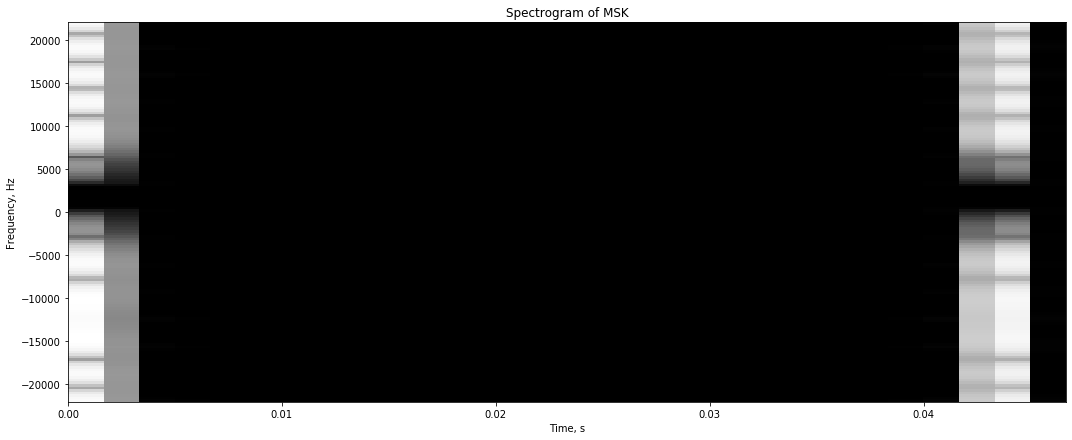

In [93]:
imp = zeros(N)
imp[::Ns] = bits.ravel()*2-1

h = signal.firwin(Ns*4,1.0/Ns)
imp_sinc = signal.fftconvolve(imp,h,mode='full')
t = r_[0.0:len(imp_sinc)]/fs
BPSK_s = imp_sinc*sin(2*pi*f0*t)

fig = plt.figure(figsize = (16,4))
plt.plot(t,BPSK_s)
plt.xlabel('time [s]')
plt.title('TBW=4 shaped BPSK signal of the sequence:'+ np.array2string(np.transpose(np.uint8(bits))))

f = r_[0:len(imp_sinc)/2.0]/len(imp_sinc)*fs
BPSK_sf = (np.fft.fft(BPSK_s))

fig = plt.figure(figsize = (16,4))
plt.plot(f,abs(BPSK_sf[0:int(len(BPSK_sf)/2+1)]))
plt.xlabel('frequency [Hz]')
plt.title('Spectrum of a pulse shaped BPSK signal ')
plt.axis((0,4096,0,max(abs(BPSK_sf))))

tt,ff,xmf = myspectrogram_hann_ovlp(BPSK_sf, 148, 44100.0, 0,dbf = 60)
plt.title('Spectrogram of MSK')

### FSK generation

In [ ]:
fs = 44100  # sampling rate
baud = 300  # symbol rate
Nbits = 10  # number of bits
Ns = int(fs/baud)
N = Nbits * Ns
f0 = 1800
bits = randn(Nbits,1) > 0

Text(0.5, 1.0, 'FSK signal of the sequence:[[1 0 0 0 1 0 1 0 1 0]]')

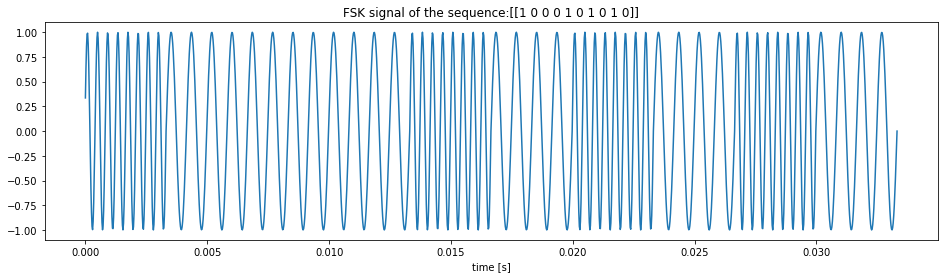

In [72]:
np.random.seed(seed=1)
Nbits = 10
N = Nbits * Ns
bits = randn(Nbits,1) > 0 
M = np.tile(bits*2-1,(1,Ns))
delta_f = 600


# compute phase by integrating frequency
ph = 2*pi*np.cumsum(f0 + M.ravel()*delta_f)/fs
t = r_[0.0:N]/fs
FSK = sin(ph)

fig = plt.figure(figsize = (16,4))
plt.plot(t,FSK)
plt.xlabel('time [s]')
plt.title('FSK signal of the sequence:'+ np.array2string(np.transpose(np.uint8(bits))))

(0, 4096, 0, 441.00000000000006)

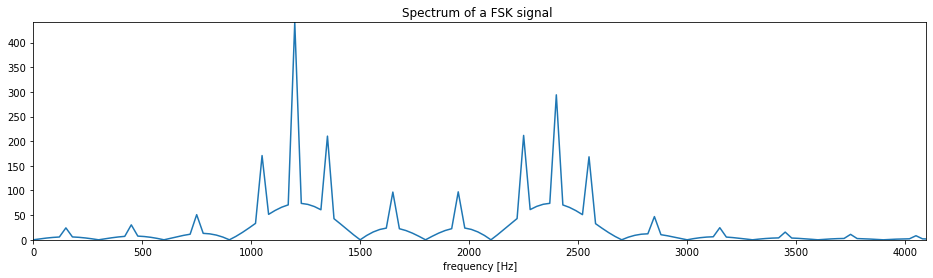

In [75]:
f = r_[0:N/2.0]/N*fs

FSK_f = (np.fft.fft(FSK))

fig = plt.figure(figsize = (16,4))
plt.plot(f,abs(FSK_f[0:int(len(FSK_f)/2)]))
plt.xlabel('frequency [Hz]')
plt.title('Spectrum of a FSK signal ')
plt.axis((0,4096,0,max(abs(FSK_f))))

1


Text(0.5, 1, 'Spectrogram of MSK')

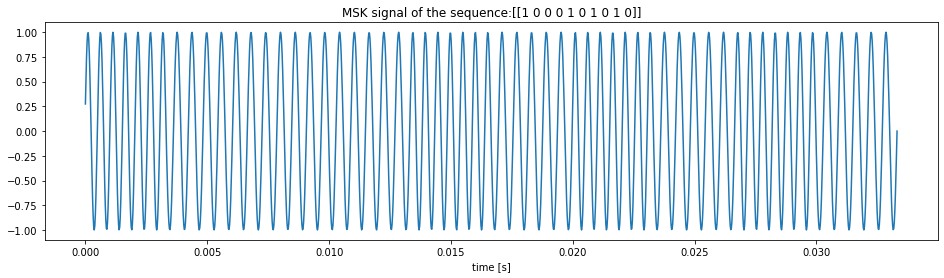

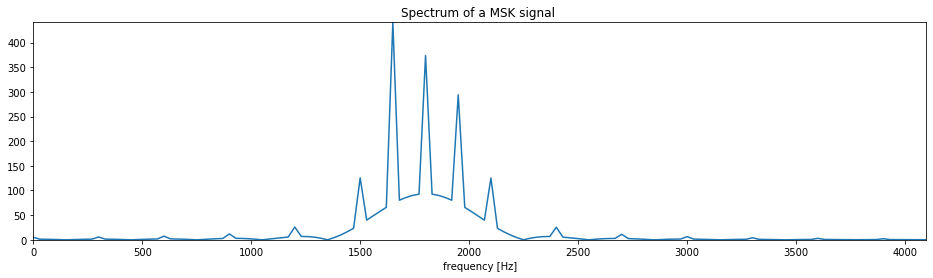

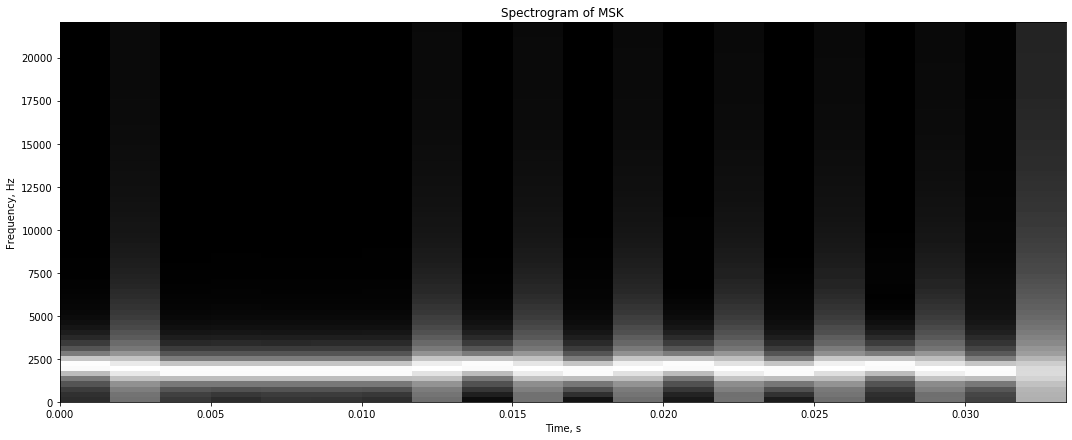

In [92]:
delta_f = 150
ph = 2*pi*np.cumsum(f0 + M.ravel()*delta_f)/fs
t = r_[0.0:N]/fs
MSK = sin(ph)

fig = plt.figure(figsize = (16,4))
plt.plot(t,MSK)
plt.xlabel('time [s]')
plt.title('MSK signal of the sequence:'+ np.array2string(np.transpose(np.uint8(bits))))

f = r_[0:N/2.0]/N*fs

MSK_f = (np.fft.fft(MSK))

fig = plt.figure(figsize = (16,4))
plt.plot(f,abs(MSK_f[0:int(len(MSK_f)/2)]))
plt.xlabel('frequency [Hz]')
plt.title('Spectrum of a MSK signal ')
plt.axis((0,4096,0,max(abs(MSK_f))))

tt,ff,xmf = myspectrogram_hann_ovlp(MSK, 148, 44100.0, 0,dbf = 60)
plt.title('Spectrogram of MSK')

### QAM generations

Text(0.5, 1.0, 'QAM=16 of the sequence:[[ 6 11  0  4  2  1  2  5  6  8  6 10  3 14  0 10]]')

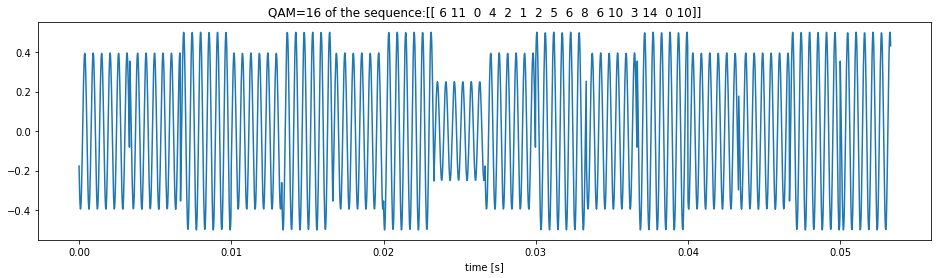

In [101]:
Nbits = 16  # number of bits
N = Nbits * Ns
code = np.array((-2-2j, -2-1j,-2+2j,-2+1j,-1-2j,-1-1j,-1+2j,-1+1j,+2-2j,+2-1j,+2+2j,+2+1j,1-2j,+1-1j,1+2j,1+1j))/2
bits = np.int16(np.random.rand(Nbits,1)*16) 
M = np.tile(code[bits],(1,Ns))
t = r_[0.0:N]/fs

# these are two ways of producing the same result:
#QAM = (M.real.ravel()*cos(2*pi*f0*t) - M.imag.ravel()*sin(2*pi*f0*t))/2/sqrt(2)
QAM = np.real(M.ravel()*np.exp(1j*2*pi*f0*t))/np.sqrt(2)/2
fig = plt.figure(figsize = (16,4))
plt.plot(t,QAM.real)
plt.xlabel('time [s]')
plt.title("QAM=16 of the sequence:"+ np.array2string(np.transpose(bits)))

Text(0.5, 1, 'Spectrogram of QAM16')

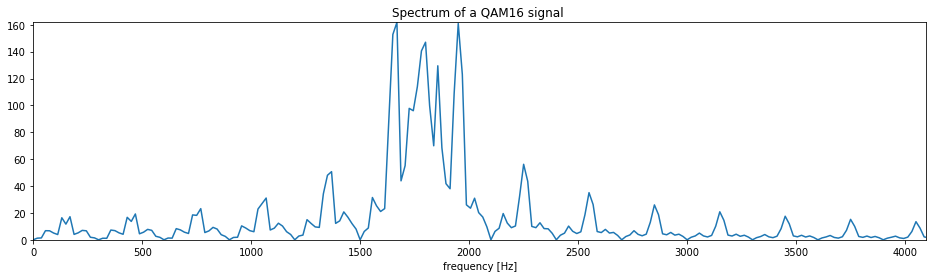

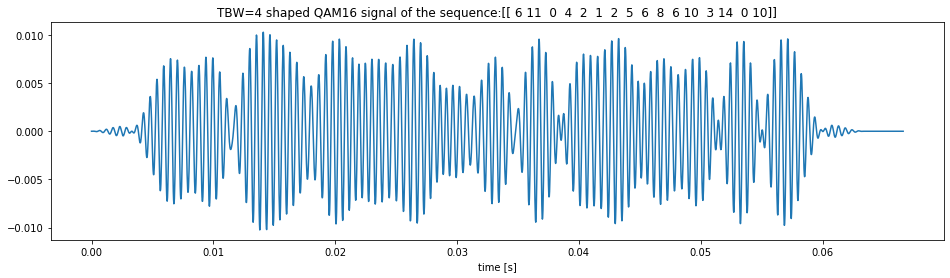

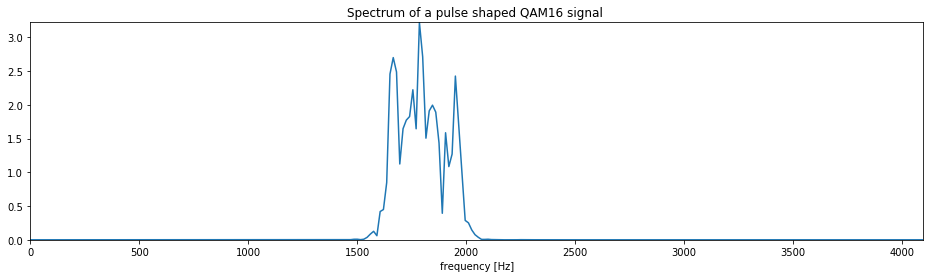

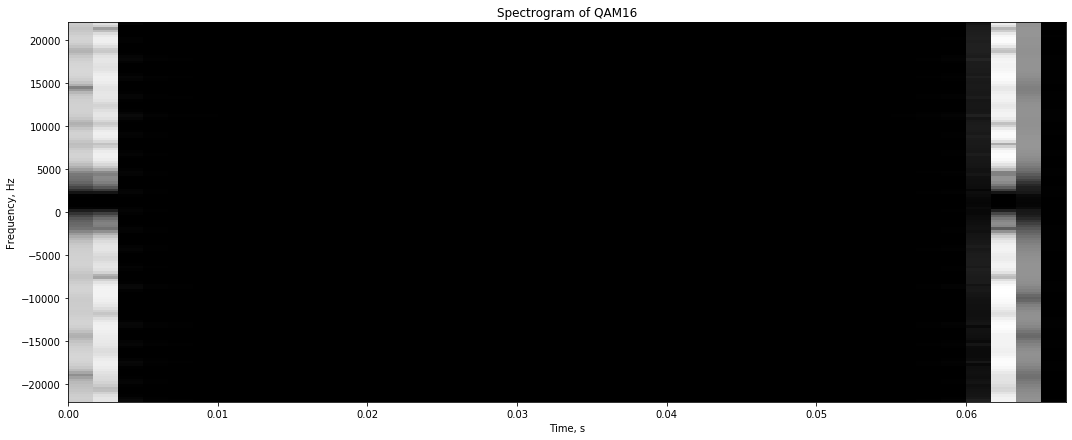

In [107]:
f = r_[0:N/2.0]/N*fs

QAM_f = (np.fft.fft(QAM))

fig = plt.figure(figsize = (16,4))
plt.plot(f,abs(QAM_f[0:int(len(QAM_f)/2)]))
plt.xlabel('frequency [Hz]')
plt.title('Spectrum of a QAM16 signal ')
plt.axis((0,4096,0,max(abs(QAM_f))))


imp = zeros(N,dtype='complex')
imp[::Ns] = code[bits].ravel()

h = signal.firwin(Ns*4,1.0/Ns)
imp_sinc = signal.fftconvolve(imp,h,mode='full')
t = r_[0.0:len(imp_sinc)]/fs
QAM_s = np.real(imp_sinc*np.exp(1j*2*pi*f0*t))


fig = plt.figure(figsize = (16,4))
plt.plot(t,QAM_s)
plt.xlabel('time [s]')
plt.title('TBW=4 shaped QAM16 signal of the sequence:'+ np.array2string(np.transpose(bits)))
f = r_[0:len(imp_sinc)/2.0]/len(imp_sinc)*fs
QAM_sf = (np.fft.fft(QAM_s))

fig = plt.figure(figsize = (16,4))
plt.plot(f,abs(QAM_sf[0:int(len(QAM_sf)/2+1)]))
plt.xlabel('frequency [Hz]')
plt.title('Spectrum of a pulse shaped QAM16 signal ')
plt.axis((0,4096,0,max(abs(QAM_sf))))

tt,ff,xmf = myspectrogram_hann_ovlp(QAM_sf, 148, 44100.0, 0,dbf = 60)
plt.title('Spectrogram of QAM16')

## Spectrogram after jamming

In [122]:
fs = 5000000  # sampling rate
baud = 300  # symbol rate
Nbits = 10  # number of bits
Ns = int(fs/baud)
N = Nbits * Ns
f0 = 880000000
bits = randn(Nbits,1) > 0

### Original BS (JCL)

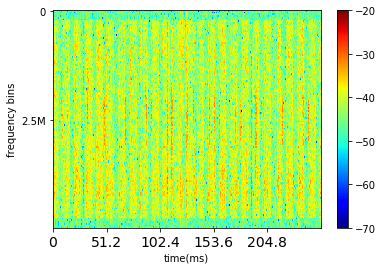

In [158]:
folder = '/net/adv_spectrum/data/downsample/downsample_10/normal/871_ab/'
spec = plot_single_spec(folder + '1580854898_871M_5m_ap')

### JCL + White-noise

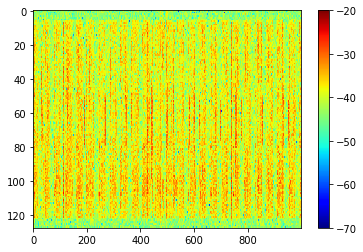

In [178]:
data_array = np.array(data).T
fig = plt.figure()
im = plt.imshow(data_array,cmap='jet',vmin=-70,vmax=-20,aspect='auto')
fig.colorbar(im)

### JCL + PSK

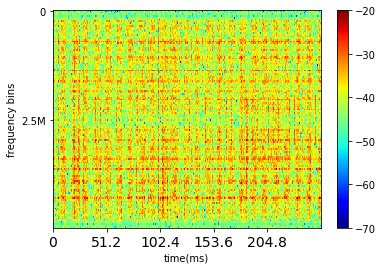

In [331]:
folder = '/net/adv_spectrum/data/downsample/downsample_10/abnormal/871_ab_psk/'
file = '1580854676_871M_5m_psk_ap'
M_spec = plot_single_spec(folder + file)

### JCL + ASK

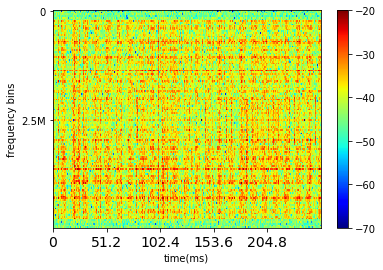

In [333]:
folder = '/net/adv_spectrum/data/downsample/downsample_10/abnormal/871_ab_ask/'
file = '1580854676_871M_5m_ask_ap'
spec = plot_single_spec(folder + file)

### JCL + FSK

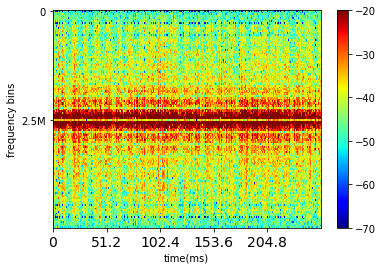

In [334]:
folder = '/net/adv_spectrum/data/downsample/downsample_10/abnormal/871_ab_fsk/'
file = '1580854676_871M_5m_fsk_ap'
spec = plot_single_spec(folder + file)

### JCL + QAM

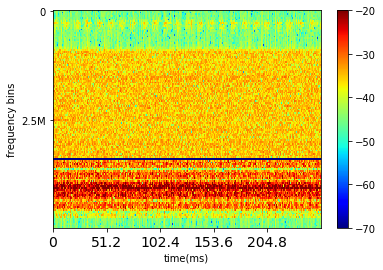

In [339]:
folder = '/net/adv_spectrum/data/downsample/downsample_10/abnormal/downtown_qam/'
file = '1519371960_880M_5m_qam_ap'
spec = plot_single_spec(folder + file)

## LSTM detection results

When FPR = 5%, the detection rate is:

|              | White-noise | ASK  | PSK   | FSK  | QAM  |
| ------------ | ----------- | ---- | ----- | ---- | ---- |
| Ryerson      | 3.0%        | 7.6% | 32.5% | 100% | 100% |
| JCL          | 2.5%        | 1.4% | 12%   | 55%  | 84%  |
| Downtown     | 1.3%        | 8.5% | 38.5% | 100% | 100% |
| Campus_drive | 3.6%        | 5.8% | 24.7% | 100% | 100% |

## Analysis and next steps

As can be seen above, since the power spectrum of (white-noise, psk, ask) do not concentrate on certain frequencies, the resulted spectrograms has no clear distinguishing patterns compared to the original one. We need to have higher power or raw-level add-ons to deal with this problem.

For next steps, I'll try back to generate (white-noise, psk, ask) signals with higher power or add them on a I/Q level.